<a href="https://colab.research.google.com/github/ImmanuelNK/Exercise-DATAMINING/blob/main/Alfred_Noel_ALPDATAMINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Classification & Clustering

Bob aspired to launch his own mobile company to rival industry leaders like Apple and Samsung, but determining the right pricing for his phones proved to be a significant hurdle. In a highly competitive market, relying on assumptions wasn’t an option. To address this, he gathered data on mobile phones from various brands, focusing on features such as RAM, storage, camera quality, and battery life, along with their respective price categories. His aim was to identify trends connecting these features to pricing tiers, but he lacked the technical knowledge in machine learning to extract meaningful insights.

To bridge this gap, Bob enlisted the help of a data analyst who developed a machine learning model to classify phones into price ranges based on their specifications. This approach provided Bob with actionable insights, enabling him to strategically price his products. With this data-driven strategy, Bob successfully introduced his first lineup of smartphones, which resonated with consumers and quickly gained traction in the market. This marked a significant milestone for his company, demonstrating the power of leveraging data analytics in a competitive landscape.

### Import Libraries


In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.cluster.hierarchy as sch
from datetime import datetime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.3
    Uninstalling mlxtend-0.23.3:
      Successfully uninstalled mlxtend-0.23.3


## Loading Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ImmanuelNK/Dataset-DATAMINING/refs/heads/main/train.csv")
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## EDA (Exploratory Data Analysis)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


Data Visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-05b4af262d98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="price_range", data=df, palette="viridis")


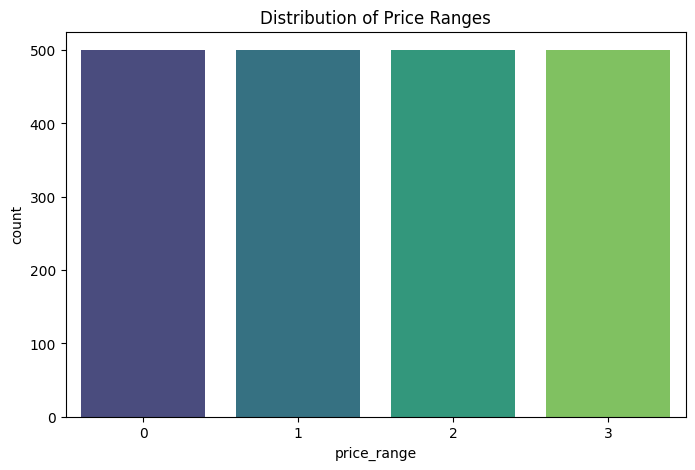

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x="price_range", data=df, palette="viridis")
plt.title("Distribution of Price Ranges")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-5bd262ef5679>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="ram", data=df, palette="coolwarm")


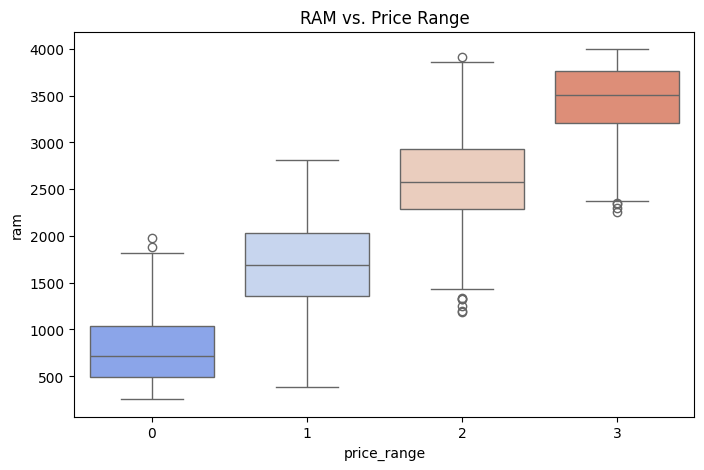

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="price_range", y="ram", data=df, palette="coolwarm")
plt.title("RAM vs. Price Range")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


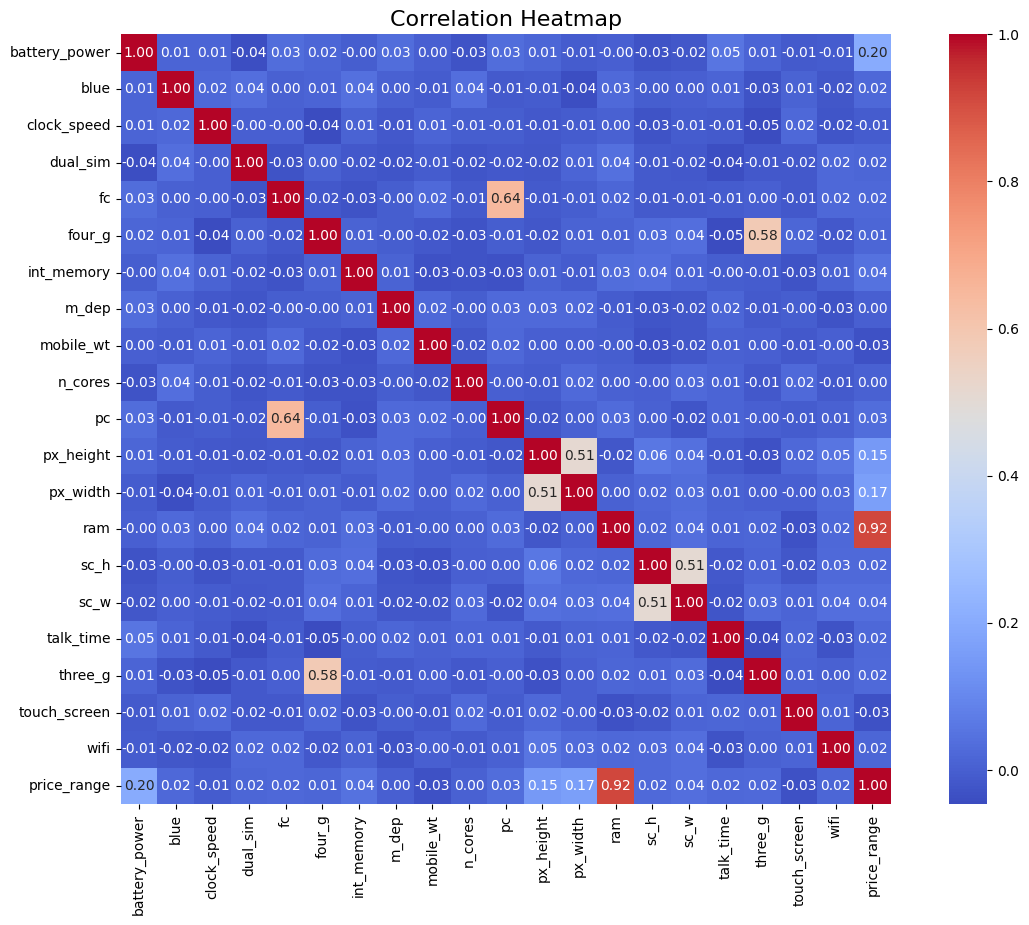

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Data Analysis
1. Classification

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
features_to_scale = ["battery_power", "ram", "px_height", "px_width"]

# Scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
X = df_scaled.drop(['price_range', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'], axis = 1)
y = df_scaled['price_range']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Class distribution after SMOTEEN:
price_range
0    405
3    390
1    310
2    269
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random Forest Classifier

a. Defining the model

b. Predict the test set results

c. Check accuracy score

d. Confusion matrix

e. Classification report

f. Results and conclusion

In [13]:
# a. Defining the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(random_state=42)

In [14]:
# b. Predicting the test set results
y_pred_rf = rf_classifier.predict(X_test)

# c. Checking accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9818181818181818


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
y_train_rf = rf_classifier.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

Testing accuracy: 0.9818
Training accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# d. Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("\nConfusion Matrix Random Forest:")
print(cm_rf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Confusion Matrix Random Forest:
[[75  1  0  0]
 [ 2 64  1  0]
 [ 0  1 53  0]
 [ 0  0  0 78]]


In [17]:
# e. Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Random Forest: \n", class_report_rf)

Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        76
           1       0.97      0.96      0.96        67
           2       0.98      0.98      0.98        54
           3       1.00      1.00      1.00        78

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# a. Defining the model
gb_model = GradientBoostingClassifier(random_state=42)

# Model fitting
gb_model.fit(X_train, y_train)

# b. Predicting the test set
y_pred = gb_model.predict(X_test)

# c. Checking accuracy score
y_train_gb = gb_model.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred)
training_accuracy = accuracy_score(y_train, y_train_gb)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Testing accuracy: 0.9709
Training accuracy: 1.0000


In [19]:
# d. Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix Random Forest:")
print(cm_gb)


Confusion Matrix Random Forest:
[[74  2  0  0]
 [ 5 62  0  0]
 [ 0  1 53  0]
 [ 0  0  0 78]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# e. Classification Report
class_report_gb = classification_report(y_test, y_pred)

print("Classification Report Gradient Boosting: \n", class_report_gb)

Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        76
           1       0.95      0.93      0.94        67
           2       1.00      0.98      0.99        54
           3       1.00      1.00      1.00        78

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# f. Conclusion
# Between these two models, we can easily say that random forest has a slightly better results, overall predicting the price range values with 98% or more accuracy.
# However, Gradient Boosting could also be a great option, probably comparing these 2 models for future data would be a great move.
# SMOTEEN an Scaling makes the accuracy slightly better, since they reduce noice and outliers' impact.
# Then, using only approximately 4 variables out of them all, also makes it easier to predict, showing that sometimes good data exploratory means good results.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



2.  Clustering



In [22]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.447214
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,0.447214
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,0.447214
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,0.447214
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.447214




* KMeans





In [23]:
# Hitung SSE untuk setiap jumlah cluster (k)
sse = []
for i in range(1, 11):  # Uji nilai k dari 1 hingga 10
    kmeans = KMeans(n_clusters=i, init="random",max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


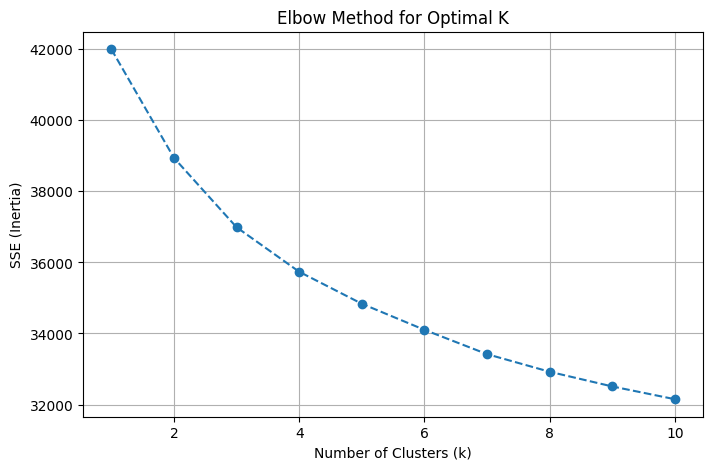

the best k for your model is  4


In [24]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.grid()
plt.show()

from kneed import KneeLocator

findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is ", best_k)

In [25]:
kmeans = KMeans(n_clusters=4, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([1, 0, 0, ..., 0, 2, 0], dtype=int32)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


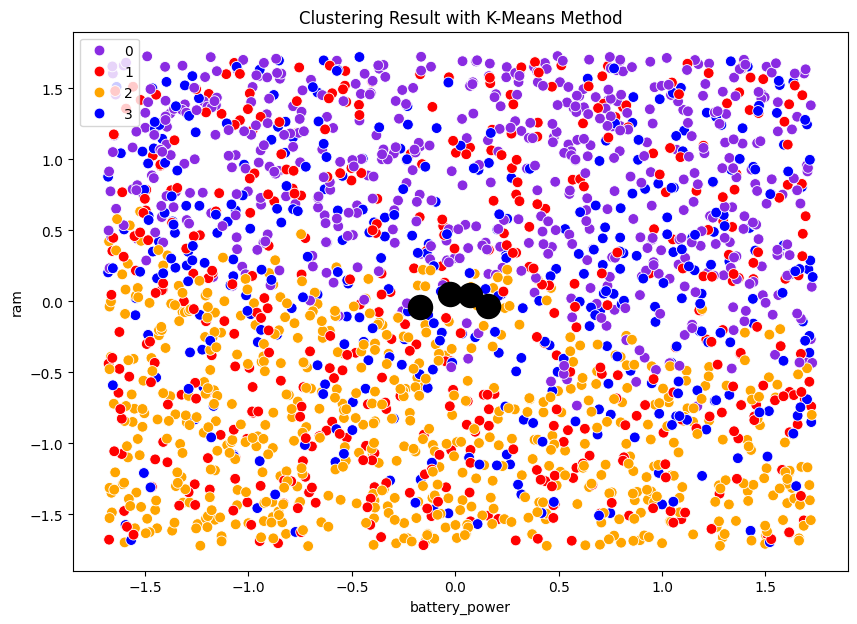

In [26]:
# visualize the result using scatter chart
plt.figure(figsize = (10, 7))

sns.scatterplot(x = "battery_power", y = "ram", hue = y_pred, palette = ["blueviolet", "red", "orange","blue"],
                data = df_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "black")
plt.xlabel('battery_power')
plt.ylabel('ram')
plt.title('Clustering Result with K-Means Method')
plt.show()

In [27]:
#inverse data yang diskalakan untuk mendapatkan nilai asli
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
#menambahkan label kluster ke data asli
df_inverse['KMeans'] = y_pred
# Analyze the clusters with the original values
df_inverse.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1.0,1
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2.0,0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2.0,0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2.0,0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1.0,3


In [28]:
df['KMeans'] = kmeans.labels_
# Now inverse transform the scaled numeric columns to retrieve the original values
df_scaled = scaler.inverse_transform(df_scaled)

# Display the first few rows of the DataFrame to verify the original values for numeric columns
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,3


In [29]:
df['KMeans'].value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
KMeans,
0,548
1,463
2,600
3,389


In [30]:
# Melakukan Pengklusteran KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans'] = kmeans.fit_predict(df_scaled)  # scaled_data adalah data yang sudah distandardisasi

# Kelompokkan berdasarkan Kluster KMeans dan hitung statistik ringkasan
agg_dict = {
    'battery_power': ['mean', 'min', 'max'],
    'blue': ['mean', 'min', 'max'],
    'clock_speed': ['mean', 'min', 'max'],
    'dual_sim': ['mean', 'min', 'max'],
    'fc': ['mean', 'min', 'max'],
    'four_g': ['mean', 'min', 'max'],
    'int_memory': ['mean', 'min', 'max'],
    'm_dep': ['mean', 'min', 'max'],
    'mobile_wt': ['mean', 'min', 'max'],
    'n_cores': ['mean', 'min', 'max'],
    'pc': ['mean', 'min', 'max'],
    'px_height': ['mean', 'min', 'max'],
    'px_width': ['mean', 'min', 'max'],
    'ram': ['mean', 'min', 'max'],
    'sc_h': ['mean', 'min', 'max'],
    'sc_w': ['mean', 'min', 'max'],
    'talk_time': ['mean', 'min', 'max'],
    'three_g': ['mean', 'min', 'max'],
    'touch_screen': ['mean', 'min', 'max'],
    'wifi': ['mean', 'min', 'max'],
}

agg_result = df.groupby('KMeans').agg(agg_dict)

# Meratakan kolom MultiIndex untuk keterbacaan yang lebih baik
agg_result.columns = [f"{col[0]} ({col[1]})" for col in agg_result.columns]

# Mengubah hasil untuk menukar baris dan kolom
agg_result_transposed = agg_result.transpose()

# Menampilkan hasil yang ditransposisi sebagai DataFrame yang ditata untuk visualisasi yang lebih baik
agg_result_styled = agg_result_transposed.style.format(precision=2)

# Tampilkan DataFrame yang ditata
agg_result_styled


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KMeans,0,1,2,3
battery_power (mean),1239.23,1232.99,1250.72,1236.30
battery_power (min),501.00,503.00,502.00,501.00
battery_power (max),1994.00,1996.00,1997.00,1998.00
blue (mean),0.52,0.48,0.47,0.50
blue (min),0.00,0.00,0.00,0.00
blue (max),1.00,1.00,1.00,1.00
clock_speed (mean),1.53,1.56,1.46,1.50
clock_speed (min),0.50,0.50,0.50,0.50
clock_speed (max),3.00,3.00,3.00,3.00
dual_sim (mean),0.55,0.48,0.49,0.50


In [31]:
# INTERPRETATION

# Cluster 0 : Ditujukan untuk pengguna yang membutuhkan spesifikasi premium, dengan RAM tinggi dan resolusi layar tinggi, cocok untuk performa tinggi. Harga berada di kategori premium atau high-end.
# Cluster 1 : Ditujukan untuk pengguna dengan anggaran terbatas, memiliki RAM rendah dan spesifikasi sederhana, cocok untuk penggunaan ringan. Harga berada di kategori budget atau entry-level.
# Cluster 2 : Ditujukan untuk pengguna yang membutuhkan perangkat untuk aktivitas sehari-hari, dengan RAM menengah dan resolusi layar tinggi, cocok untuk penggunaan intensif moderat. Harga berada di kategori mid-range.
# Cluster 3 : Ditujukan untuk pengguna yang membutuhkan performa seimbang, dengan RAM sedang dan resolusi layar cukup, cocok untuk penggunaan umum. Harga berada di kategori upper mid-range.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



*   Hierarchical Clustering





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


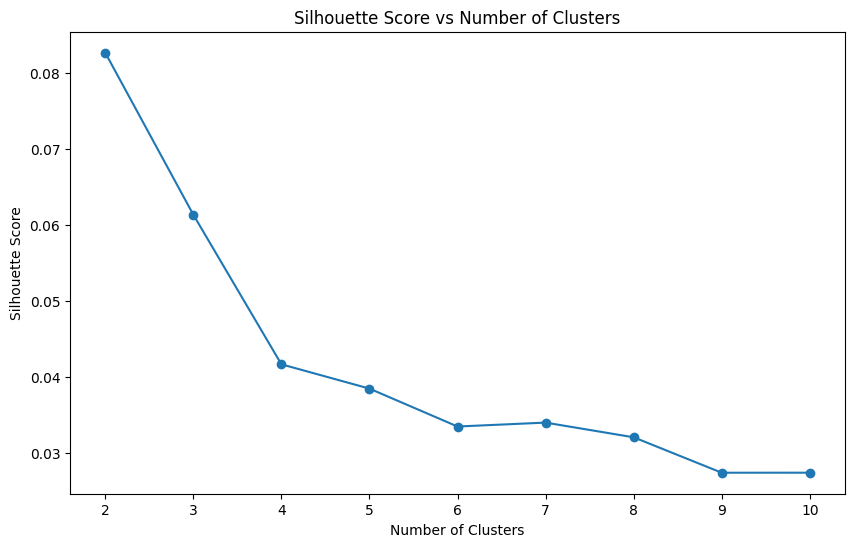

The best number of clusters is: 2


In [32]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

for k in k_range:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters is: {best_k}")

In [33]:
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters = 2, metric='euclidean', linkage='ward')
y_pred = hc.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df['AgglomerativeCluster'] = y_pred

# show the df
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,KMeans,AgglomerativeCluster
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,-0.447214,1.418712,0
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,0.447214,0.548069,0
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,0.447214,0.548069,0
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,0.447214,-1.193215,1
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,-0.447214,0.548069,0


In [35]:
# Perform Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
df['AgglomerativeCluster'] = agglo.fit_predict(df_scaled)

# Group by Agglomerative Clusters and calculate summary statistics
agg_result = df.groupby('AgglomerativeCluster').agg(
    {
        'battery_power': ['mean', 'min', 'max'],
        'blue': ['mean', 'min', 'max'],
        'clock_speed': ['mean', 'min', 'max'],
        'dual_sim': ['mean', 'min', 'max'],
        'fc': ['mean', 'min', 'max'],
        'four_g': ['mean', 'min', 'max'],
        'int_memory': ['mean', 'min', 'max'],
        'm_dep': ['mean', 'min', 'max'],
        'mobile_wt': ['mean', 'min', 'max'],
        'n_cores': ['mean', 'min', 'max'],
        'pc': ['mean', 'min', 'max'],
        'px_height': ['mean', 'min', 'max'],
        'px_width': ['mean', 'min', 'max'],
        'ram': ['mean', 'min', 'max'],
        'sc_h': ['mean', 'min', 'max'],
        'sc_w': ['mean', 'min', 'max'],
        'talk_time': ['mean', 'min', 'max'],
        'three_g': ['mean', 'min', 'max'],
        'touch_screen': ['mean', 'min', 'max'],
        'wifi': ['mean', 'min', 'max'],
    }
)

# Flattening MultiIndex columns for better readability
agg_result.columns = [f"{col[0]} ({col[1]})" if col[1] else col[0] for col in agg_result.columns]

# Transposing the result to swap rows and columns
agg_result_transposed = agg_result.transpose()

# Displaying the transposed result as a styled DataFrame for better visualization
agg_result_styled = agg_result_transposed.style.format(precision=2)

# Display the styled DataFrame
agg_result_styled


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AgglomerativeCluster,0,1
battery_power (mean),-0.07,0.13
battery_power (min),-1.68,-1.67
battery_power (max),1.73,1.72
blue (mean),0.01,-0.02
blue (min),-0.99,-0.99
blue (max),1.01,1.01
clock_speed (mean),0.01,-0.01
clock_speed (min),-1.25,-1.25
clock_speed (max),1.81,1.81
dual_sim (mean),0.01,-0.02


In [36]:
df['AgglomerativeCluster'].value_counts().sort_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
AgglomerativeCluster,
0,1267
1,733


In [37]:
#Interpretation

#Kluster 0 : Perangkat di cluster ini cenderung memiliki RAM lebih besar, clock speed lebih tinggi, dan performa CPU yang lebih baik.
#Kluster 1 : Perangkat di cluster ini cenderung memiliki resolusi layar lebih tinggi, daya baterai lebih besar, dan waktu bicara lebih lama.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):  # Mencoba jumlah cluster dari 2 hingga 9
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)  # X adalah dataset
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)
    print(f"Jumlah Cluster: {k}, Silhouette Score: {score}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Jumlah Cluster: 2, Silhouette Score: 0.4012285898271234
Jumlah Cluster: 3, Silhouette Score: 0.2775539635965582
Jumlah Cluster: 4, Silhouette Score: 0.26207818899114865
Jumlah Cluster: 5, Silhouette Score: 0.2421933337872067
Jumlah Cluster: 6, Silhouette Score: 0.23545057121398177
Jumlah Cluster: 7, Silhouette Score: 0.22705888681328026
Jumlah Cluster: 8, Silhouette Score: 0.22072575707688688
Jumlah Cluster: 9, Silhouette Score: 0.2260951715252185


## **Hierarchical Visualization**

### Single Linkage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


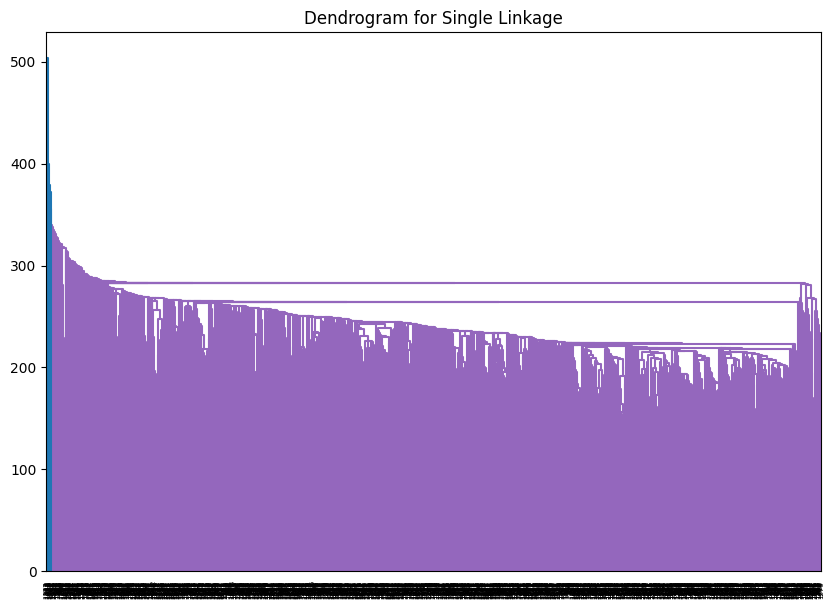

In [39]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Single Linkage")
dend = sch.dendrogram(sch.linkage(df_scaled, method='single'))
plt.show()

### Complete Linkage

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with MAX Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Average Linkage

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with AVERAGE Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.show()

### Ward Methode

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Customer Hierarchical Clustering with WARD Method")
dend = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.show()
